# Practice 5 (Linear Multi-Class Classification)

## 1) Iris 3-Class Classifier (Two Features)
Train a classifier that classifies Iris flowers to three classes (Setosa, versicolor, virginica) using sepal length and sepal width only
- Use the dataset in iris.csv on Canvas
- Use 0.33 of the dataset for testing
- Plot the feature space, boundary, and calculate the accuracy and the confusion matrix
- Then: Improve your classifier to user all 4 features (sepal/petal/length/width)

<img align="left" src="Iris3ClassClassifier.JPG">

   sample  sepal length  sepal width  petal length  petal width  class
0       0           5.1          3.5           1.4          0.2      0
1       1           4.9          3.0           1.4          0.2      0
2       2           4.7          3.2           1.3          0.2      0
3       3           4.6          3.1           1.5          0.2      0
4       4           5.0          3.6           1.4          0.2      0

First Five Data = 
[[4.6 3.2 0.  0. ]
 [4.6 3.1 0.  0. ]
 [5.4 3.4 0.  0. ]
 [5.  3.  0.  0. ]
 [5.7 4.4 0.  0. ]]

Confusion Matrix = 
[[17  1  0]
 [ 0 11  6]
 [ 0  5 10]]

Accuracy Score = 0.76


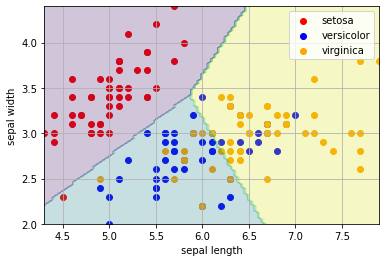

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv('iris.csv')
print(df.head())

x1 = df['sepal length']
x2 = df['sepal width']
y = df['class']
X = np.array([x1,x2]).T
y = np.array(y)
### print(f'X.shape: {X.shape}, ny.shape: {y.shape}') >>> (150, 2), (150,)

# scatter plot
plt.scatter(X[y==0,0], X[y==0,1], c='r')
plt.scatter(X[y==1,0], X[y==1,1], c='b')
plt.scatter(X[y==2,0], X[y==2,1], c='orange')
plt.grid(1)
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
#or# plt.xlim(3,8) # range for sepal length
#or# plt.ylim(2,4) # range for sepal width
plt.xlim(x1.min(), x1.max()) # range for sepal length
plt.ylim(x2.min(), x2.max()) # range for sepal width

# plot boundaries
#or# xp1, xp2 = np.meshgrid(np.linspace(3,8,100), np.linspace(2,4,100))
xp1, xp2 = np.meshgrid(np.linspace(x1.min(), x1.max(), 100), np.linspace(x2.min(), x2.max(), 100))
#A# np.linspace creates a sequence of numbers i.e. 1D-shaped array.
### print(xp1); print(xp2)
### print(xp1.shape, xp2.shape) >>> (100, 100) (100, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

# train model
model = LogisticRegression()
model.fit(X_train,y_train)

# vectorize mesh grid
xp1_v = xp1.reshape(-1,1) ### print(xp1_v.shape) >>> (10000, 1)
xp2_v = xp2.reshape(-1,1) ### print(xp2_v.shape) >>> (10000, 1)

# convert vectorized meshgrid to dataset
Xp_data = np.append(xp1_v, xp2_v, axis=1) ### print(Xp_data.shape) >>> (10000, 2)
#or# np.hstack(xp1_v, xp2_v) 
### print(Xp_data)
z = model.predict(Xp_data)
z = z.reshape(xp1.shape) ### print(z.shape) >>> (100, 100)
plt.contourf(xp1, xp2, z, alpha=0.25)

y_pred = model.predict(X_test)
print(f'\nFirst Five Data = \n{np.hstack((X_test, y_test.reshape(-1,1), y_pred.reshape(-1,1)))[:5]}')
print(f'\nConfusion Matrix = \n{confusion_matrix(y_test, y_pred)}')
print(f'\nAccuracy Score = {accuracy_score(y_test, y_pred)}')

## 2) Iris 3-Class Classifier (Four Features)

In [2]:
# Improving the classifier to use all 4 features (sepal/petal/length/width)

x1 = df['sepal length']
x2 = df['sepal width']
x3 = df['petal length']
x4 = df['petal width']
y = df['class']
X = np.array([x1, x2, x3, x4]).T
y = np.array(y)
### print(f'X.shape: {X.shape}, y.shape: {y.shape}') >>> (150, 4), (150,)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=3)

# train model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

xp1, xp2 = np.meshgrid(np.linspace(x1.min(), x1.max(), 100), np.linspace(x2.min(), x2.max(), 100))
xp3, xp4 = np.meshgrid(np.linspace(x3.min(), x3.max(), 100), np.linspace(x4.min(), x4.max(), 100))
### print(xp1.shape, xp2.shape, xp3.shape, xp4.shape) >>> (100, 100) (100, 100) (100, 100) (100, 100)

# vectorize mesh grid
xp1_v = xp1.reshape(-1,1) ### print(xp1_v.shape) >>> (10000, 1)
xp2_v = xp2.reshape(-1,1) ### print(xp2_v.shape) >>> (10000, 1)
xp3_v = xp3.reshape(-1,1) ### print(xp3_v.shape) >>> (10000, 1)
xp4_v = xp4.reshape(-1,1) ### print(xp4_v.shape) >>> (10000, 1)

# convert vectorized meshgrid to dataset
Xp_data = np.hstack((xp1_v, xp2_v, xp3_v, xp4_v)) ### print(Xp_data.shape) >>> (10000, 4)
### print(Xp_data)

z = model.predict(Xp_data)
z = z.reshape(xp1.shape) ### print(z.shape) >>> (100, 100)

y_pred = model.predict(X_test)
print(f'\nFirst Five Data = \n{np.hstack((X_test, y_test.reshape(-1,1), y_pred.reshape(-1,1)))[:5]}')
print(f'\nConfusion Matrix = \n{confusion_matrix(y_test, y_pred)}')
print(f'\nAccuracy Score = {accuracy_score(y_test, y_pred)}')


First Five Data = 
[[4.6 3.2 1.4 0.2 0.  0. ]
 [4.6 3.1 1.5 0.2 0.  0. ]
 [5.4 3.4 1.5 0.4 0.  0. ]
 [5.  3.  1.6 0.2 0.  0. ]
 [5.7 4.4 1.5 0.4 0.  0. ]]

Confusion Matrix = 
[[18  0  0]
 [ 0 15  2]
 [ 0  0 15]]

Accuracy Score = 0.96


## 3) Digits Classifier (All Digits)

Training set: Images of digits: 0, 1, …, 9 (all or some of the samples/classes)
- Scale images down to 8x8 pixels (use im.resize((im_width,im_width))
- Train a multi-class classifier and test it on samples in the test set.

<img align="left" src="DigitsClassifier.JPG">

In [100]:
import os # to listdir
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from PIL import Image # python image lib

# creating empty lists
folder_training = [0 for i in range(10)] ### print(folder_training) >>> [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
folder_testing = [0 for i in range(10)] ### print(folder_testing) >>> [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
classes = [i for i in range(10)] ### print(classes) >>> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for i in range(10):
    folder_training[i] = 'MNIST/training/' + str(i) + '/'
    folder_testing[i] = 'MNIST/training/' + str(i) + '/'

def get_data(folder, im_width, label, n_samples):
    file_names = os.listdir(folder)
    ## np.empty: returns a new array of given shape and type, without initializing entries.
    x = np.empty((n_samples, im_width**2))
    y = np.empty((n_samples, 1))
    for i in range(n_samples):
        path = folder + file_names[i]
        im = Image.open(path).convert('L')
        im = im.resize((im_width, im_width))
        im_array = asarray(im)
        x[i,:] = im_array.reshape(1,-1)
        y[i,0] = classes[label]
    return x, y

# training data
im_width = 8
P_per_class = 1000;
X_train = np.empty((P_per_class*10, im_width**2))
y_train = np.empty((P_per_class*10, 1))

for i in range(10):
    x_i, y_i = get_data(folder_training[i], im_width, i, P_per_class)
    X_train[i*P_per_class:(i+1)*P_per_class, :] = x_i
    y_train[i*P_per_class:(i+1)*P_per_class, :] = y_i
print(f'X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}')
    
# train LogisticRegression model
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train.ravel())

# testing data
P_per_class = 500;
X_test = np.empty((P_per_class*10, im_width**2))
y_test = np.empty((P_per_class*10, 1))
    
for i in range(10):
    x_i, y_i = get_data(folder_training[i], im_width, i, P_per_class)
    X_test[i*P_per_class:(i+1)*P_per_class, :] = x_i
    y_test[i*P_per_class:(i+1)*P_per_class,:] = y_i
    
print(f'\nX_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}')
y_pred = model.predict(X_test) 
print(f'\nConfusion Matrix = \n{confusion_matrix(y_test, y_pred)}')
print(f'\nAccuracy Score = {accuracy_score(y_test, y_pred)}')
print(f'Model Coeficient Shape = {model.coef_.shape}')

X_train.shape = (10000, 64), y_train.shape = (10000, 1)

X_test.shape = (5000, 64), y_test.shape = (5000, 1)

Confusion Matrix = 
[[480   0   1   2   1   5   4   1   4   2]
 [  0 479   5   0   2   2   1   2   9   0]
 [  3   6 437  11  10   3   8   5  16   1]
 [  2   1  24 443   3  11   0   2   6   8]
 [  0   3   9   0 458   0   5   2   2  21]
 [  5   2   4  16   1 449   7   2  12   2]
 [  2   1   1   0   0   3 492   1   0   0]
 [  1   1   7   0   5   1   0 458   1  26]
 [  4   9  11  22   4  19   4   2 420   5]
 [  3   4   0   7  11   4   0  12   6 453]]

Accuracy Score = 0.9138
Model Coeficient Shape = (10, 64)
